In [13]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import time
from datetime import datetime
from pytz import timezone
from statsmodels.distributions.empirical_distribution import ECDF

In [14]:
df = pd.read_csv("Forecast.csv",parse_dates=True)

In [15]:
df.tail()

product        date   city  sales
4795    SECF  11-01-2017  Delhi   5837
4796    SECF  12-01-2017  Delhi   7451
4797    SECF  01-01-2018  Delhi   7712
4798    SECF  02-01-2018  Delhi  31525
4799    SECF  03-01-2018  Delhi  36136

In [16]:
df['Date'] = pd.to_datetime(df['date'])

In [17]:
#df = df[df.Date < pd.to_datetime('2018-01-01')]

In [18]:
df.tail()

product        date   city  sales       Date
4795    SECF  11-01-2017  Delhi   5837 2017-11-01
4796    SECF  12-01-2017  Delhi   7451 2017-12-01
4797    SECF  01-01-2018  Delhi   7712 2018-01-01
4798    SECF  02-01-2018  Delhi  31525 2018-02-01
4799    SECF  03-01-2018  Delhi  36136 2018-03-01

In [19]:
df.tail()

product        date   city  sales       Date
4795    SECF  11-01-2017  Delhi   5837 2017-11-01
4796    SECF  12-01-2017  Delhi   7451 2017-12-01
4797    SECF  01-01-2018  Delhi   7712 2018-01-01
4798    SECF  02-01-2018  Delhi  31525 2018-02-01
4799    SECF  03-01-2018  Delhi  36136 2018-03-01

In [20]:
df.head()

product        date    city    sales       Date
0  Mixers  04-01-2014  Mumbai  2679347 2014-04-01
1  Mixers  05-01-2014  Mumbai  3864612 2014-05-01
2  Mixers  06-01-2014  Mumbai  2932658 2014-06-01
3  Mixers  07-01-2014  Mumbai  3703713 2014-07-01
4  Mixers  08-01-2014  Mumbai  3931029 2014-08-01

In [21]:
df.head(50)

product        date    city    sales       Date
0              Mixers  04-01-2014  Mumbai  2679347 2014-04-01
1              Mixers  05-01-2014  Mumbai  3864612 2014-05-01
2              Mixers  06-01-2014  Mumbai  2932658 2014-06-01
3              Mixers  07-01-2014  Mumbai  3703713 2014-07-01
4              Mixers  08-01-2014  Mumbai  3931029 2014-08-01
5              Mixers  09-01-2014  Mumbai  4677008 2014-09-01
6              Mixers  10-01-2014  Mumbai  4331662 2014-10-01
7              Mixers  11-01-2014  Mumbai  2184730 2014-11-01
8              Mixers  12-01-2014  Mumbai  4131878 2014-12-01
9              Mixers  01-01-2015  Mumbai  4043952 2015-01-01
10             Mixers  02-01-2015  Mumbai  3276885 2015-02-01
11             Mixers  03-01-2015  Mumbai  5043804 2015-03-01
12             Mixers  04-01-2015  Mumbai  3625236 2015-04-01
13             Mixers  05-01-2015  Mumbai  4326062 2015-05-01
14             Mixers  06-01-2015  Mumbai  2418609 2015-06-01
15             Mixers  07-01-2015  Mumbai  3937404 2015-07-01
16             Mixers  08-01-2015  Mumbai  3708630 2015-08-01
17             Mixers  09-01-2015  Mumbai  3804926 2015-09-01
18             Mixers  10-01-2015  Mumbai  5417580 2015-10-01
19             Mixers  11-01-2015  Mumbai  2938341 2015-11-01
20             Mixers  12-01-2015  Mumbai  4300940 2015-12-01
21             Mixers  01-01-2016  Mumbai  3229175 2016-01-01
22             Mixers  02-01-2016  Mumbai  3267240 2016-02-01
23             Mixers  03-01-2016  Mumbai  6103232 2016-03-01
24             Mixers  04-01-2016  Mumbai  5736690 2016-04-01
25             Mixers  05-01-2016  Mumbai  3515403 2016-05-01
26             Mixers  06-01-2016  Mumbai  1983288 2016-06-01
27             Mixers  07-01-2016  Mumbai  3723448 2016-07-01
28             Mixers  08-01-2016  Mumbai  4012728 2016-08-01
29             Mixers  09-01-2016  Mumbai  5112100 2016-09-01
30             Mixers  10-01-2016  Mumbai  5203170 2016-10-01
31             Mixers  11-01-2016  Mumbai  2197132 2016-11-01
32             Mixers  12-01-2016  Mumbai  2906503 2016-12-01
33             Mixers  01-01-2017  Mumbai  3926367 2017-01-01
34             Mixers  02-01-2017  Mumbai  3637237 2017-02-01
35             Mixers  03-01-2017  Mumbai  5661553 2017-03-01
36             Mixers  04-01-2017  Mumbai  2173903 2017-04-01
37             Mixers  05-01-2017  Mumbai  4273063 2017-05-01
38             Mixers  06-01-2017  Mumbai  3628117 2017-06-01
39             Mixers  07-01-2017  Mumbai  5514155 2017-07-01
40             Mixers  08-01-2017  Mumbai  6511352 2017-08-01
41             Mixers  09-01-2017  Mumbai  7282989 2017-09-01
42             Mixers  10-01-2017  Mumbai  7769826 2017-10-01
43             Mixers  11-01-2017  Mumbai  2595569 2017-11-01
44             Mixers  12-01-2017  Mumbai  4306914 2017-12-01
45             Mixers  01-01-2018  Mumbai  6261570 2018-01-01
46             Mixers  02-01-2018  Mumbai  2344462 2018-02-01
47             Mixers  03-01-2018  Mumbai  3875078 2018-03-01
48  Induction cookers  04-01-2014  Mumbai  1028092 2014-04-01
49  Induction cookers  05-01-2014  Mumbai  1482890 2014-05-01

In [22]:
df.set_index('Date',inplace=True)
df.head()

product        date    city    sales
Date                                           
2014-04-01  Mixers  04-01-2014  Mumbai  2679347
2014-05-01  Mixers  05-01-2014  Mumbai  3864612
2014-06-01  Mixers  06-01-2014  Mumbai  2932658
2014-07-01  Mixers  07-01-2014  Mumbai  3703713
2014-08-01  Mixers  08-01-2014  Mumbai  3931029

In [23]:
df.tail()

product        date   city  sales
Date                                        
2017-11-01    SECF  11-01-2017  Delhi   5837
2017-12-01    SECF  12-01-2017  Delhi   7451
2018-01-01    SECF  01-01-2018  Delhi   7712
2018-02-01    SECF  02-01-2018  Delhi  31525
2018-03-01    SECF  03-01-2018  Delhi  36136

In [24]:
Ban_Dry1= df[(df['city'] == 'Bangalore') & (df['product'] == 'Dry Iron')]

In [25]:
Ban_Dry1.tail()

product        date       city   sales
Date                                               
2017-11-01  Dry Iron  11-01-2017  Bangalore  335353
2017-12-01  Dry Iron  12-01-2017  Bangalore  633185
2018-01-01  Dry Iron  01-01-2018  Bangalore  674245
2018-02-01  Dry Iron  02-01-2018  Bangalore  407478
2018-03-01  Dry Iron  03-01-2018  Bangalore  652154

In [28]:
Ban_Dry1.shape

(48, 4)

In [29]:
Ban_Dry= Ban_Dry1.drop('date', axis = 1)

In [30]:
Ban_Dry.head()

product       city   sales
Date                                   
2014-04-01  Dry Iron  Bangalore  521820
2014-05-01  Dry Iron  Bangalore  752658
2014-06-01  Dry Iron  Bangalore  571154
2014-07-01  Dry Iron  Bangalore  721322
2014-08-01  Dry Iron  Bangalore  765594

In [31]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

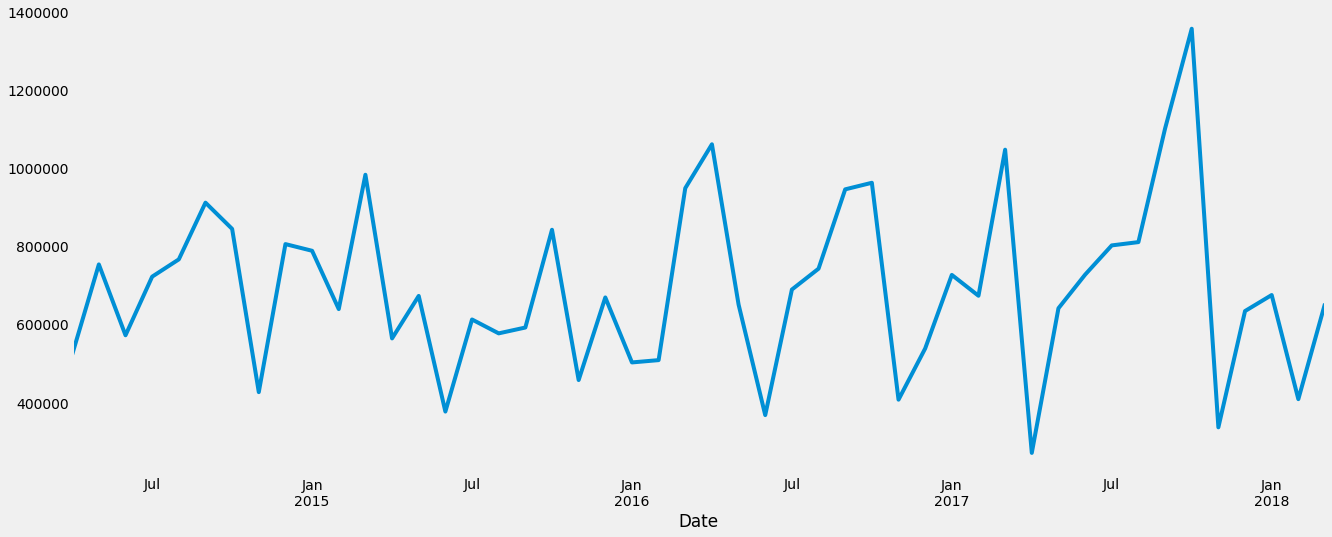

In [32]:
Ban_Dry['sales'].plot()
plt.grid();

In [33]:
Ban_Dry.sort_index(inplace= True)

In [34]:
Ban_Dry.head()

product       city   sales
Date                                   
2014-04-01  Dry Iron  Bangalore  521820
2014-05-01  Dry Iron  Bangalore  752658
2014-06-01  Dry Iron  Bangalore  571154
2014-07-01  Dry Iron  Bangalore  721322
2014-08-01  Dry Iron  Bangalore  765594

In [35]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

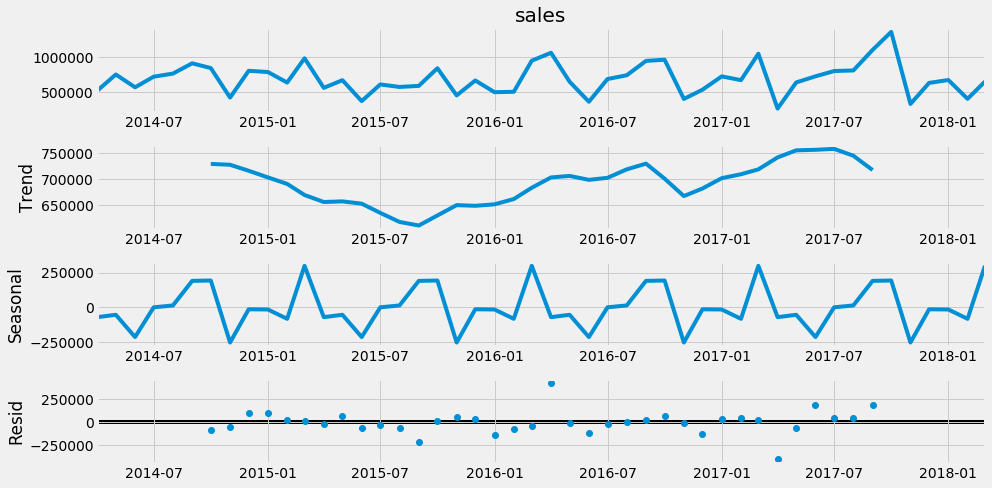

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(Ban_Dry['sales'],model='additive')
decomposition.plot();

In [37]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    728831.416667
2014-11-01    727188.166667
2014-12-01    715680.166667
2015-01-01    702962.500000
2015-02-01    690492.041667
2015-03-01    669266.041667
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    -70287.454861
2014-05-01    -53255.440972
2014-06-01   -214081.579861
2014-07-01       732.892361
2014-08-01     14300.475694
2014-09-01    191773.434028
2014-10-01    194439.072917
2014-11-01   -253460.913194
2014-12-01    -13391.788194
2015-01-01    -15018.107639
2015-02-01    -82385.927083
2015-03-01    300635.336806
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    -79650.489583
2014-11-01    -48237.

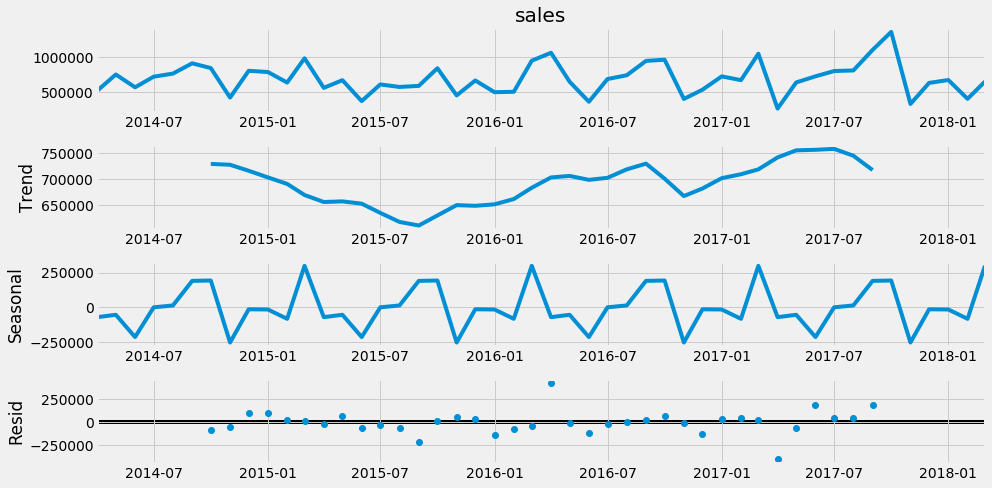

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(Ban_Dry['sales'],model='Multiplicative')
decomposition.plot();

In [39]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    728831.416667
2014-11-01    727188.166667
2014-12-01    715680.166667
2015-01-01    702962.500000
2015-02-01    690492.041667
2015-03-01    669266.041667
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    -70287.454861
2014-05-01    -53255.440972
2014-06-01   -214081.579861
2014-07-01       732.892361
2014-08-01     14300.475694
2014-09-01    191773.434028
2014-10-01    194439.072917
2014-11-01   -253460.913194
2014-12-01    -13391.788194
2015-01-01    -15018.107639
2015-02-01    -82385.927083
2015-03-01    300635.336806
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    -79650.489583
2014-11-01    -48237.

In [42]:
Ban_Dry.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-04-01 to 2018-03-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  48 non-null     object
 1   city     48 non-null     object
 2   sales    48 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [43]:
train    =   Ban_Dry[0:int(len(Ban_Dry)*0.7)] 
test     =  Ban_Dry[int(len(Ban_Dry)*0.7):]

In [44]:
train.shape

(33, 3)

In [45]:
test.shape

(15, 3)

In [46]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


product       city   sales
Date                                   
2014-04-01  Dry Iron  Bangalore  521820
2014-05-01  Dry Iron  Bangalore  752658
2014-06-01  Dry Iron  Bangalore  571154
2014-07-01  Dry Iron  Bangalore  721322
2014-08-01  Dry Iron  Bangalore  765594

Last few rows of Training Data


product       city   sales
Date                                   
2016-08-01  Dry Iron  Bangalore  741749
2016-09-01  Dry Iron  Bangalore  944967
2016-10-01  Dry Iron  Bangalore  961801
2016-11-01  Dry Iron  Bangalore  406138
2016-12-01  Dry Iron  Bangalore  537265

First few rows of Test Data


product       city    sales
Date                                    
2017-01-01  Dry Iron  Bangalore   725786
2017-02-01  Dry Iron  Bangalore   672340
2017-03-01  Dry Iron  Bangalore  1046533
2017-04-01  Dry Iron  Bangalore   269828
2017-05-01  Dry Iron  Bangalore   640281

Last few rows of Test Data


product       city   sales
Date                                   
2017-11-01  Dry Iron  Bangalore  335353
2017-12-01  Dry Iron  Bangalore  633185
2018-01-01  Dry Iron  Bangalore  674245
2018-02-01  Dry Iron  Bangalore  407478
2018-03-01  Dry Iron  Bangalore  652154

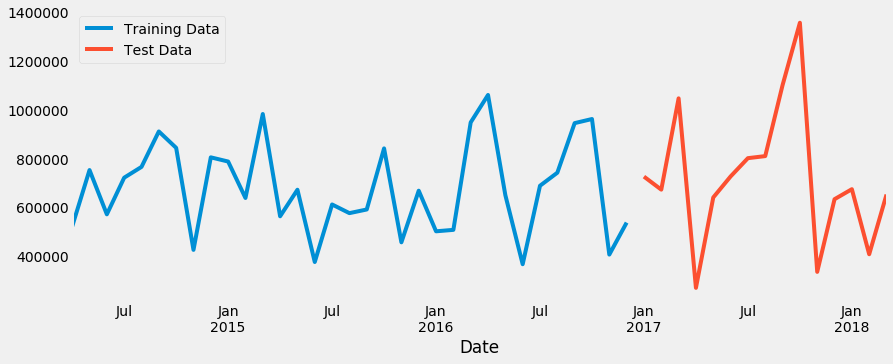

In [47]:
train['sales'].plot(figsize=(13,5), fontsize=14)
test['sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [48]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [49]:
from sklearn import metrics

Simpleaverage

In [50]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [51]:
SimpleAverage_test['mean_forecast'] = train['sales'].mean()
SimpleAverage_test.head()

product       city    sales  mean_forecast
Date                                                   
2017-01-01  Dry Iron  Bangalore   725786  678627.606061
2017-02-01  Dry Iron  Bangalore   672340  678627.606061
2017-03-01  Dry Iron  Bangalore  1046533  678627.606061
2017-04-01  Dry Iron  Bangalore   269828  678627.606061
2017-05-01  Dry Iron  Bangalore   640281  678627.606061

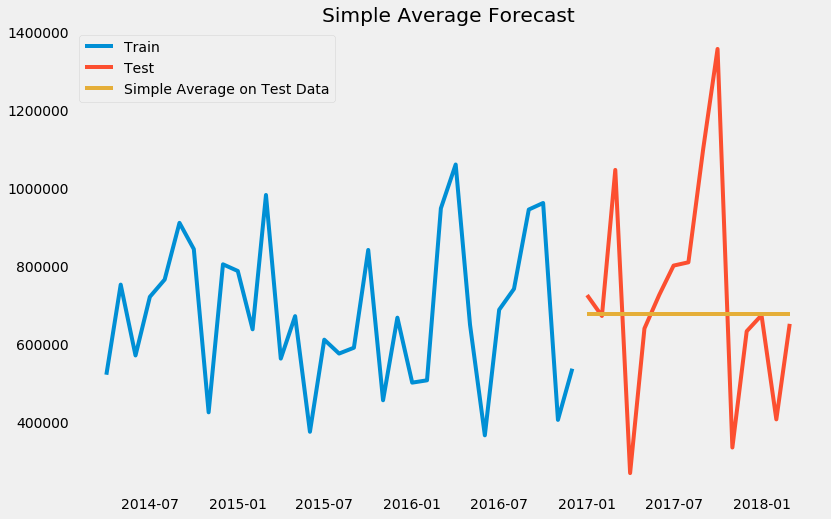

In [52]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['sales'], label='Train')
plt.plot(SimpleAverage_test['sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [53]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 279572.805


In [54]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])
resultsDf

Test RMSE
Simple Average  279572.805114

In [55]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Simple average

In [56]:
SES_train = train.copy()
SES_test = test.copy()

In [57]:
model_SES = SimpleExpSmoothing(SES_train['sales'])

In [58]:
model_SES_autofit = model_SES.fit(optimized=True)

In [59]:
model_SES_autofit.params

{'smoothing_level': 0.12011627906976743,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 521820.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [60]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

product       city    sales        predict
Date                                                   
2017-01-01  Dry Iron  Bangalore   725786  673838.125096
2017-02-01  Dry Iron  Bangalore   672340  673838.125096
2017-03-01  Dry Iron  Bangalore  1046533  673838.125096
2017-04-01  Dry Iron  Bangalore   269828  673838.125096
2017-05-01  Dry Iron  Bangalore   640281  673838.125096

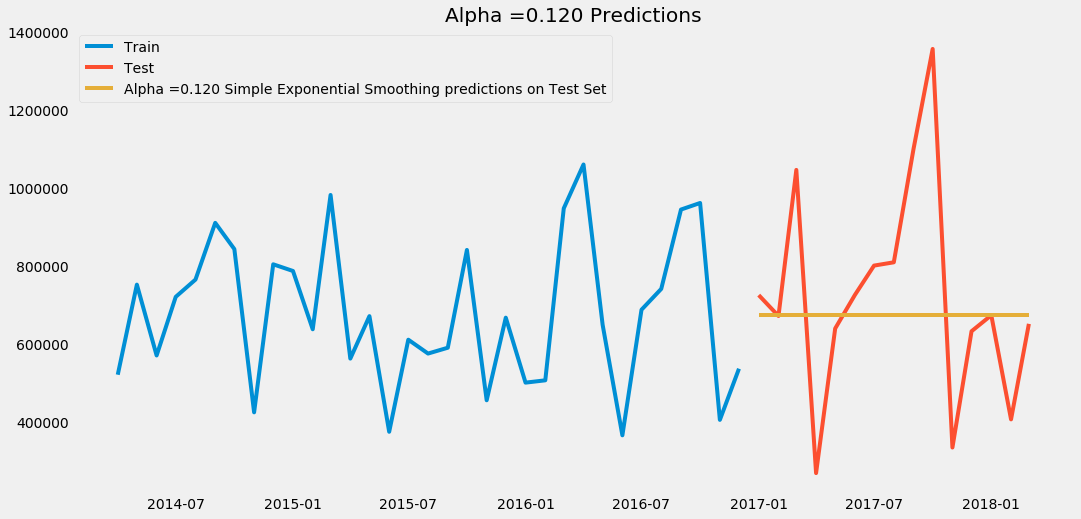

In [62]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.120 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.120 Predictions');

In [63]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['sales'],SES_test['predict'],squared=False)
print("For Alpha =0.120 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.120 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 280380.650


In [64]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [65]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict'])
print('\nMAPE:',mape)


MAPE: 33.540848015472804


In [66]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE': [mape] },index=['Alpha=0.338,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
Simple Average                          279572.805114        NaN
Alpha=0.338,SimpleExponentialSmoothing  280380.650172  33.540848

In [67]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [68]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [69]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values     Train RMSE      Test RMSE
0           0.1  205189.953999  280725.336566
1           0.2  206683.362452  281376.940326
2           0.3  210823.942471  286098.516235
3           0.4  215870.148245  294444.258559
4           0.5  221285.580498  305533.994386
5           0.6  226861.852750  317600.472391
6           0.7  232673.447195  328329.239603
7           0.8  238997.894379  335427.372270
8           0.9  246217.787368  337200.582000

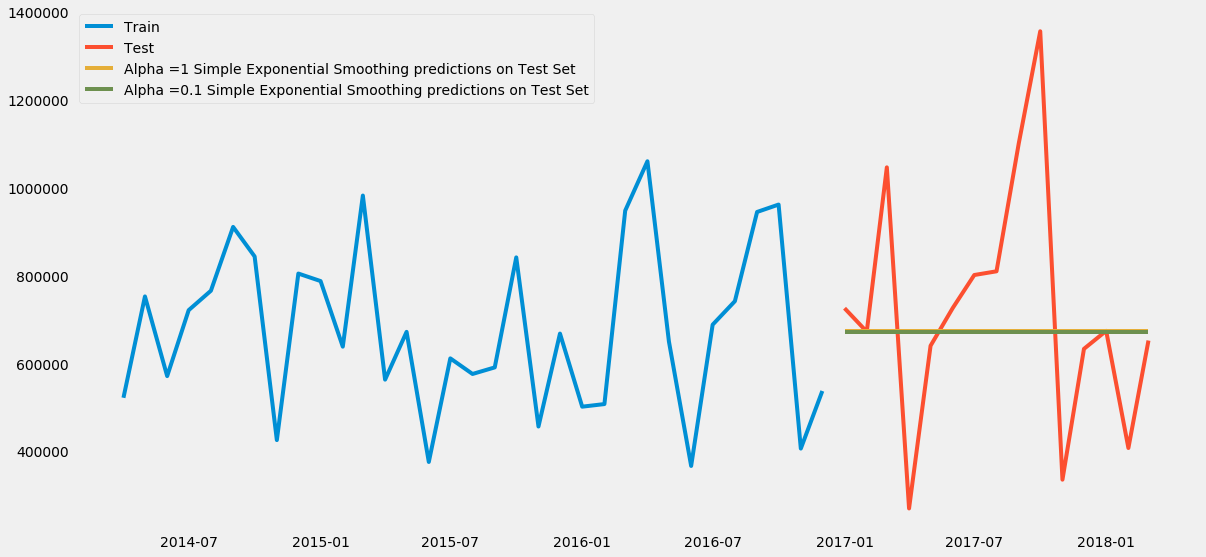

In [71]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [72]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict',0.2])
print('\nMAPE:',mape)


MAPE: 33.403841347464414


In [73]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE  Test MAPE
Simple Average                          279572.805114        NaN
Alpha=0.338,SimpleExponentialSmoothing  280380.650172  33.540848
Alpha=0.3,SimpleExponentialSmoothing    280725.336566  33.403841

Double

In [74]:
DES_train = train.copy()
DES_test = test.copy()

In [75]:
model_DES = Holt(DES_train['sales'])

In [76]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [77]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend = j, optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [78]:
resultsDf_7

Alpha Values  Beta Values     Train RMSE     Test RMSE
0            0.1          0.1  914357.468315  3.500989e+05
1            0.1          0.2  662864.190383  5.857789e+05
2            0.1          0.3  564744.811690  3.180188e+05
3            0.1          0.4  497532.401549  5.828363e+05
4            0.1          0.5  449534.629032  5.995275e+05
..           ...          ...            ...           ...
95           1.0          0.6  342043.323928  6.209259e+05
96           1.0          0.7  359203.134610  4.410964e+05
97           1.0          0.8  378000.880238  2.974136e+05
98           1.0          0.9  398859.414401  5.571257e+05
99           1.0          1.0  422268.552299  1.083622e+06

[100 rows x 4 columns]

In [79]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values     Train RMSE      Test RMSE
12           0.2          0.3  329791.323530  275876.641268
11           0.2          0.2  380082.275457  278309.584909
20           0.3          0.1  365101.793406  283293.857265
6            0.1          0.7  383776.946865  289045.881951
10           0.2          0.1  494781.327649  292517.025499

In [81]:
mape = mean_absolute_percentage_error(DES_test['sales'],DES_test['predict',0.2,0.2])
print('\nMAPE:',mape)


MAPE: 37.354590615201644


In [82]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.2,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
Simple Average                                 279572.805114        NaN
Alpha=0.338,SimpleExponentialSmoothing         280380.650172  33.540848
Alpha=0.3,SimpleExponentialSmoothing           280725.336566  33.403841
Alpha=0.2,Beta=0.3,DoubleExponentialSmoothing  275876.641268  37.354591

In [83]:
TES_train = train.copy()
TES_test = test.copy()

In [84]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['sales'],trend='additive',seasonal='Multiplicative',initialization_method='estimated')

In [85]:
model_TES_autofit = model_TES.fit()

In [86]:
model_TES_autofit.params

{'smoothing_level': 0.1817857142857143,
 'smoothing_trend': 0.045446428571428575,
 'smoothing_seasonal': 0.1888186813186813,
 'damping_trend': nan,
 'initial_level': 744224.3138888887,
 'initial_trend': -11040.968434343406,
 'initial_seasons': array([0.8806174 , 1.04893905, 0.59039921, 0.98780371, 0.95656369,
        0.99245136, 1.18722117, 0.60014253, 1.15327338, 1.14915254,
        0.94799614, 1.5054398 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [87]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

product       city    sales  auto_predict
Date                                                  
2017-01-01  Dry Iron  Bangalore   725786  7.194425e+05
2017-02-01  Dry Iron  Bangalore   672340  6.175098e+05
2017-03-01  Dry Iron  Bangalore  1046533  1.011085e+06
2017-04-01  Dry Iron  Bangalore   269828  6.859123e+05
2017-05-01  Dry Iron  Bangalore   640281  6.727626e+05

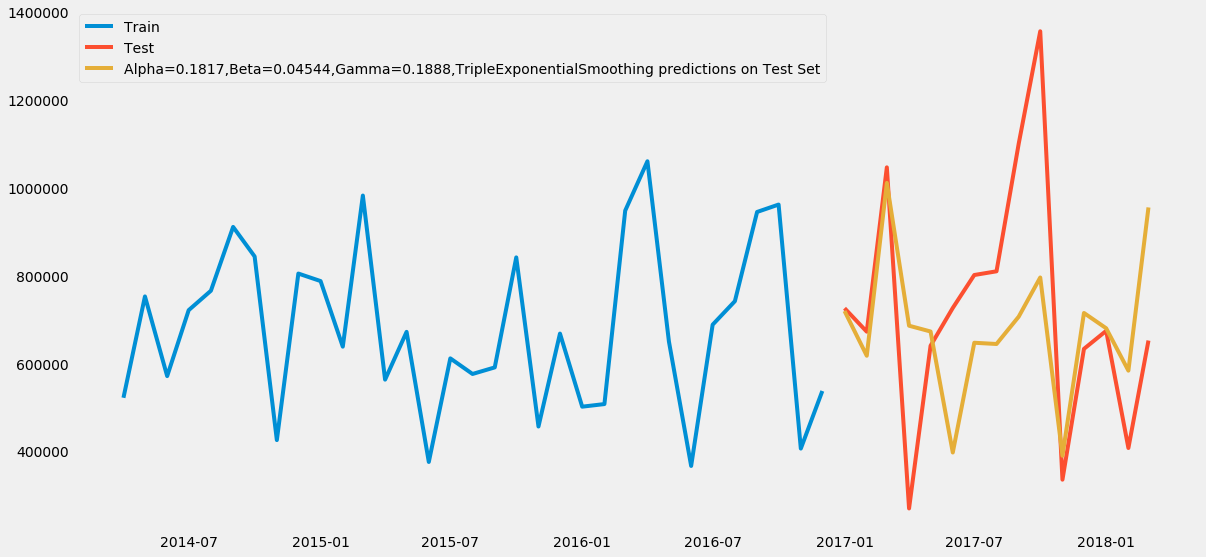

In [88]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['sales'], label='Train')
plt.plot(TES_test['sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.1817,Beta=0.04544,Gamma=0.1888,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [89]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['sales'],TES_test['auto_predict'],squared=False)
print("Forlabel='Alpha=0.1817,Beta=0.04544,Gamma=0.1888', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Forlabel='Alpha=0.1817,Beta=0.04544,Gamma=0.1888', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 250359.460


In [90]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['auto_predict'])
print('\nMAPE:',mape)


MAPE: 30.2373009230181


In [91]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1], 'Test MAPE' : [mape]}
                           ,index=['Alpha=0.1817,Beta=0.04544,Gamma=0.1888,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE  Test MAPE
Simple Average                                      279572.805114        NaN
Alpha=0.338,SimpleExponentialSmoothing              280380.650172  33.540848
Alpha=0.3,SimpleExponentialSmoothing                280725.336566  33.403841
Alpha=0.2,Beta=0.3,DoubleExponentialSmoothing       275876.641268  37.354591
Alpha=0.1817,Beta=0.04544,Gamma=0.1888,TripleEx...  250359.459839  30.237301

In [92]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [93]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [94]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.1          0.1           0.1  1.457893e+05  2.516703e+05
1             0.1          0.1           0.2  1.459966e+05  2.489728e+05
2             0.1          0.1           0.3  1.464617e+05  2.500621e+05
3             0.1          0.1           0.4  1.471711e+05  2.546094e+05
4             0.1          0.1           0.5  1.481302e+05  2.622262e+05
..            ...          ...           ...           ...           ...
995           1.0          1.0           0.6  9.343114e+05  7.676711e+06
996           1.0          1.0           0.7  3.840596e+06  1.239144e+07
997           1.0          1.0           0.8  1.431816e+06  1.023275e+07
998           1.0          1.0           0.9  1.697159e+06  1.787394e+07
999           1.0          1.0           1.0  1.117973e+07  5.828819e+07

[1000 rows x 5 columns]

In [95]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values     Train RMSE      Test RMSE
1             0.1          0.1           0.2  145996.611798  248972.794599
2             0.1          0.1           0.3  146461.656502  250062.106425
121           0.2          0.3           0.2  153966.879273  251062.652431
0             0.1          0.1           0.1  145789.322386  251670.327426
200           0.3          0.1           0.1  150680.150769  252889.944958

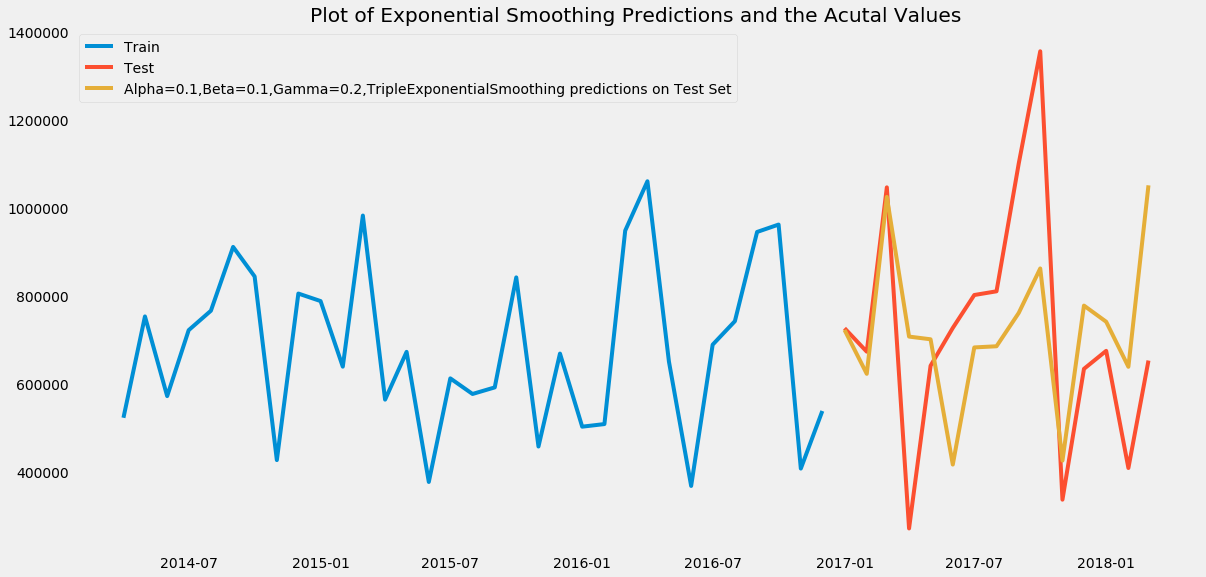

In [96]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')


plt.plot(TES_test['predict', 0.1000000000000000, 0.1000000000000000, 0.2], label='Alpha=0.1,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [97]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['predict',0.1,0.1,0.2])
print('\nMAPE:',mape)


MAPE: 33.25409193676107


In [98]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE  Test MAPE
Simple Average                                      279572.805114        NaN
Alpha=0.338,SimpleExponentialSmoothing              280380.650172  33.540848
Alpha=0.3,SimpleExponentialSmoothing                280725.336566  33.403841
Alpha=0.2,Beta=0.3,DoubleExponentialSmoothing       275876.641268  37.354591
Alpha=0.1817,Beta=0.04544,Gamma=0.1888,TripleEx...  250359.459839  30.237301
Alpha=0.1,Beta=0.1,Gamma=0.2,TripleExponentialS...  248972.794599  33.254092

In [99]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE  Test MAPE
Alpha=0.1,Beta=0.1,Gamma=0.2,TripleExponentialS...  248972.794599  33.254092
Alpha=0.1817,Beta=0.04544,Gamma=0.1888,TripleEx...  250359.459839  30.237301
Alpha=0.2,Beta=0.3,DoubleExponentialSmoothing       275876.641268  37.354591
Simple Average                                      279572.805114        NaN
Alpha=0.338,SimpleExponentialSmoothing              280380.650172  33.540848
Alpha=0.3,SimpleExponentialSmoothing                280725.336566  33.403841

In [100]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

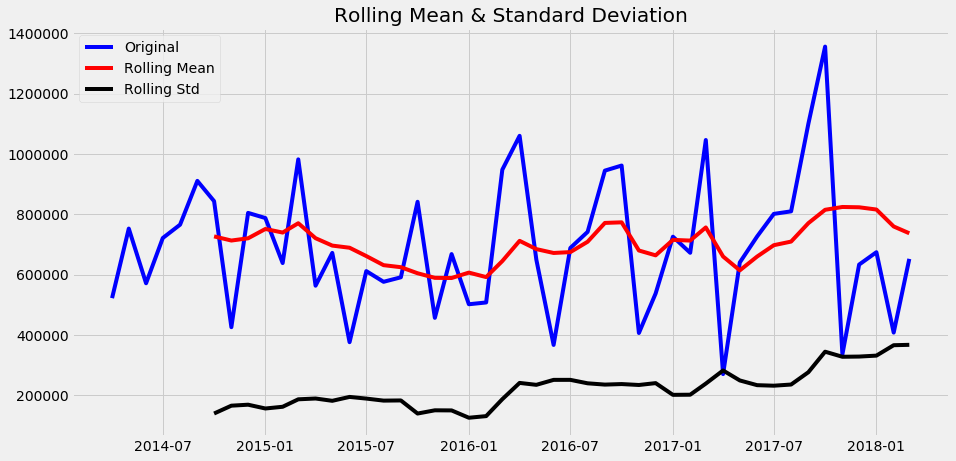

Results of Dickey-Fuller Test:
Test Statistic                -6.599002e+00
p-value                        6.810441e-09
#Lags Used                     0.000000e+00
Number of Observations Used    4.700000e+01
Critical Value (1%)           -3.577848e+00
Critical Value (5%)           -2.925338e+00
Critical Value (10%)          -2.600774e+00
dtype: float64 



In [101]:
test_stationarity(Ban_Dry['sales'])

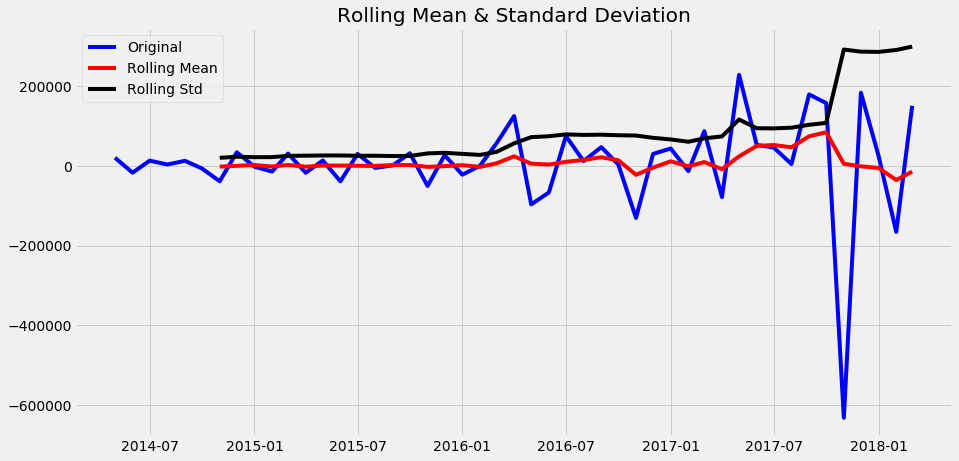

Results of Dickey-Fuller Test:
Test Statistic                 -3.681083
p-value                         0.004387
#Lags Used                      7.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64 



In [124]:
#test_stationarity(Pat_Dry['sales'].diff().dropna())

In [242]:
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [243]:
test.dropna(inplace=True)

In [244]:
test = test.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [102]:
from statsmodels.tsa.stattools import adfuller

In [103]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(0,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 0, 0)
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [104]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [105]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 0, 0) - AIC:982.0383860200312
ARIMA(0, 0, 1) - AIC:900.668318129238
ARIMA(0, 0, 2) - AIC:900.511529963941
ARIMA(0, 0, 3) - AIC:902.5049056351118
ARIMA(0, 1, 0) - AIC:890.4845148111865
ARIMA(0, 1, 1) - AIC:883.6235848010151
ARIMA(0, 1, 2) - AIC:883.3315645828932
ARIMA(0, 1, 3) - AIC:883.8686035210735
ARIMA(1, 0, 0) - AIC:900.5776732836558
ARIMA(1, 0, 1) - AIC:900.1034328000126
ARIMA(1, 0, 2) - AIC:901.2059379321574
ARIMA(1, 0, 3) - AIC:903.1042416928617
ARIMA(1, 1, 0) - AIC:889.656965771893
ARIMA(1, 1, 1) - AIC:884.2979235856094
ARIMA(1, 1, 2) - AIC:881.3881370400193
ARIMA(1, 1, 3) - AIC:885.7300281806711
ARIMA(2, 0, 0) - AIC:901.0536926514227
ARIMA(2, 0, 1) - AIC:900.6534025189391
ARIMA(2, 0, 2) - AIC:897.2193065493702
ARIMA(2, 0, 3) - AIC:902.8919166822102
ARIMA(2, 1, 0) - AIC:889.1329701872282
ARIMA(2, 1, 1) - AIC:885.5686187247743
ARIMA(2, 1, 2) - AIC:883.3488355219883
ARIMA(2, 1, 3) - AIC:886.6352064615304
ARIMA(3, 0, 0) - AIC:901.2735384231311
ARIMA(3, 0, 1) - AIC:902.842

In [106]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param         AIC
14  (1, 1, 2)  881.388137
6   (0, 1, 2)  883.331565
22  (2, 1, 2)  883.348836
5   (0, 1, 1)  883.623585
7   (0, 1, 3)  883.868604

In [107]:
auto_ARIMA = ARIMA(train['sales'], order=(1,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   33
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -436.694
Date:                Sat, 21 Aug 2021   AIC                            881.388
Time:                        11:25:44   BIC                            887.251
Sample:                    04-01-2014   HQIC                           883.332
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6188      0.239     -2.587      0.010      -1.088      -0.150
ma.L1          0.0026      1.248      0.002      0.998      -2.444       2.449
ma.L2         -0.9782      0.425     -2.302      0.0

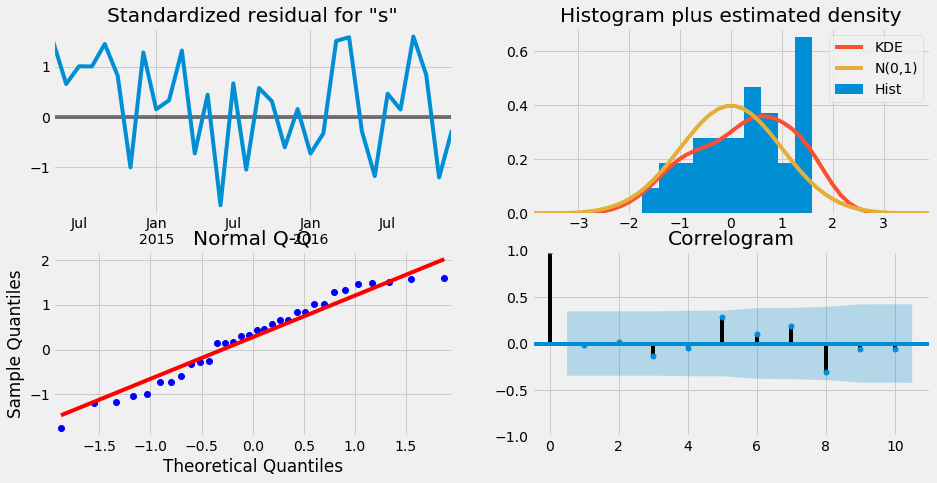

In [108]:
results_auto_ARIMA.plot_diagnostics();

In [109]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [111]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [112]:
rmse = mean_squared_error(test['sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 281947.736168939 
MAPE: 32.96176398778289


In [113]:
resultsDf_8_4 = pd.DataFrame({'Test RMSE': [resultsDf_8_3.sort_values(by=['Test RMSE']).values[0][1]],'Test MAPE':[mape]}
                           ,index=['ARIMA(1,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_4])
resultsDf

Test RMSE  Test MAPE
Simple Average                                      279572.805114        NaN
Alpha=0.338,SimpleExponentialSmoothing              280380.650172  33.540848
Alpha=0.3,SimpleExponentialSmoothing                280725.336566  33.403841
Alpha=0.2,Beta=0.3,DoubleExponentialSmoothing       275876.641268  37.354591
Alpha=0.1817,Beta=0.04544,Gamma=0.1888,TripleEx...  250359.459839  30.237301
Alpha=0.1,Beta=0.1,Gamma=0.2,TripleExponentialS...  248972.794599  33.254092
ARIMA(1,1,2)                                            33.254092  32.961764

In [114]:
import itertools
p = q = range(0, 4)
d= range(0,1)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 0, 3)(0, 0, 3, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 0, 3)(1, 0, 3, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 0, 3)(2, 0, 3, 12)
Model: (3, 0, 0)(3, 0, 0, 12)
Model: (3, 0, 1)(3, 0, 1, 12)
Model: (3, 0, 2)(3, 0, 2, 12)
Model: (3, 0, 3)(3, 0, 3, 12)


In [115]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [116]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:954.9742768412391
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:638.0378624721577
SARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:217.75880550954906
SARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:8.0
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:573.3502270314112
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:538.8737613036067
SARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:219.75880529034
SARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC:10.0
SARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:250.45404088313884
SARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:245.97628052987858
SARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:221.7587507515312
SARIMA(0, 0, 0)x(2, 0, 3, 12)12 - AIC:12.0
SARIMA(0, 0, 0)x(3, 0, 0, 12)12 - AIC:8.0
SARIMA(0, 0, 0)x(3, 0, 1, 12)12 - AIC:10.0
SARIMA(0, 0, 0)x(3, 0, 2, 12)12 - AIC:12.0
SARIMA(0, 0, 0)x(3, 0, 3, 12)12 - AIC:14.0
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:908.2418738295869
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:555.3878198721887
SARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:209.35948013354027
SARIMA(0, 0, 1)x(0, 0, 3, 1

SARIMA(2, 0, 2)x(0, 0, 3, 12)12 - AIC:16.0
SARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:523.5754939228
SARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:500.44431637107516
SARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:175.11194672820972
SARIMA(2, 0, 2)x(1, 0, 3, 12)12 - AIC:18.0
SARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:198.41810621065844
SARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:201.00801459552932
SARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:175.77395335578126
SARIMA(2, 0, 2)x(2, 0, 3, 12)12 - AIC:20.0
SARIMA(2, 0, 2)x(3, 0, 0, 12)12 - AIC:16.0
SARIMA(2, 0, 2)x(3, 0, 1, 12)12 - AIC:18.0
SARIMA(2, 0, 2)x(3, 0, 2, 12)12 - AIC:20.0
SARIMA(2, 0, 2)x(3, 0, 3, 12)12 - AIC:22.0
SARIMA(2, 0, 3)x(0, 0, 0, 12)12 - AIC:800.7956793325751
SARIMA(2, 0, 3)x(0, 0, 1, 12)12 - AIC:472.41385063516907
SARIMA(2, 0, 3)x(0, 0, 2, 12)12 - AIC:151.8692940585647
SARIMA(2, 0, 3)x(0, 0, 3, 12)12 - AIC:18.0
SARIMA(2, 0, 3)x(1, 0, 0, 12)12 - AIC:524.710520407642
SARIMA(2, 0, 3)x(1, 0, 1, 12)12 - AIC:474.80023019965984
SARIMA(2, 0, 3)x(1, 0, 2, 12)12 - AIC

In [117]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal   AIC
3   (0, 0, 0)  (0, 0, 3, 12)   8.0
12  (0, 0, 0)  (3, 0, 0, 12)   8.0
67  (1, 0, 0)  (0, 0, 3, 12)  10.0
28  (0, 0, 1)  (3, 0, 0, 12)  10.0
7   (0, 0, 0)  (1, 0, 3, 12)  10.0

In [118]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0,0,0),
                                seasonal_order=(0,0,3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            sales   No. Observations:                   33
Model:             SARIMAX(0, 0, [1, 2, 3], 12)   Log Likelihood                   0.000
Date:                          Sat, 21 Aug 2021   AIC                              8.000
Time:                                  11:29:02   BIC                                nan
Sample:                              04-01-2014   HQIC                               nan
                                   - 12-01-2016                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0           0
ma.S.L24            0         -0        nan        

In [119]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [120]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales       mean        mean_se  mean_ci_lower  mean_ci_upper
2017-01-01   0.0  178604.578284 -350058.540911  350058.540911
2017-02-01   0.0  178604.578284 -350058.540911  350058.540911
2017-03-01   0.0  178604.578284 -350058.540911  350058.540911
2017-04-01   0.0  178604.578284 -350058.540911  350058.540911
2017-05-01   0.0  178601.778782 -350053.053988  350053.053988

In [121]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 599540947712.7333 
MAPE: 100.0


In [123]:
resultsDf_8_5 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,0,0)(0,0,3)12'])

resultsDf = pd.concat([resultsDf, resultsDf_8_5])
resultsDf

Test RMSE   Test MAPE
Simple Average                                      2.795728e+05         NaN
Alpha=0.338,SimpleExponentialSmoothing              2.803807e+05   33.540848
Alpha=0.3,SimpleExponentialSmoothing                2.807253e+05   33.403841
Alpha=0.2,Beta=0.3,DoubleExponentialSmoothing       2.758766e+05   37.354591
Alpha=0.1817,Beta=0.04544,Gamma=0.1888,TripleEx...  2.503595e+05   30.237301
Alpha=0.1,Beta=0.1,Gamma=0.2,TripleExponentialS...  2.489728e+05   33.254092
ARIMA(1,1,2)                                        3.325409e+01   32.961764
SARIMA(0,1,0)(0,1,2)12                              5.995409e+11  100.000000
SARIMA(0,0,0)(0,0,3)12                              5.995409e+11  100.000000

In [124]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

Test RMSE   Test MAPE
ARIMA(1,1,2)                                        3.325409e+01   32.961764
Alpha=0.1,Beta=0.1,Gamma=0.2,TripleExponentialS...  2.489728e+05   33.254092
Alpha=0.1817,Beta=0.04544,Gamma=0.1888,TripleEx...  2.503595e+05   30.237301
Alpha=0.2,Beta=0.3,DoubleExponentialSmoothing       2.758766e+05   37.354591
Simple Average                                      2.795728e+05         NaN
Alpha=0.338,SimpleExponentialSmoothing              2.803807e+05   33.540848
Alpha=0.3,SimpleExponentialSmoothing                2.807253e+05   33.403841
SARIMA(0,1,0)(0,1,2)12                              5.995409e+11  100.000000
SARIMA(0,0,0)(0,0,3)12                              5.995409e+11  100.000000

In [125]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [126]:
Ban_Dry.head()

product       city   sales
Date                                   
2014-04-01  Dry Iron  Bangalore  521820
2014-05-01  Dry Iron  Bangalore  752658
2014-06-01  Dry Iron  Bangalore  571154
2014-07-01  Dry Iron  Bangalore  721322
2014-08-01  Dry Iron  Bangalore  765594

In [127]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(Ban_Dry1['date'])
df_prophet['y'] =Ban_Dry1['sales']
df_prophet.tail()

ds       y
Date                         
2017-11-01 2017-11-01  335353
2017-12-01 2017-12-01  633185
2018-01-01 2018-01-01  674245
2018-02-01 2018-02-01  407478
2018-03-01 2018-03-01  652154

In [128]:
df_prophet.shape

(48, 2)

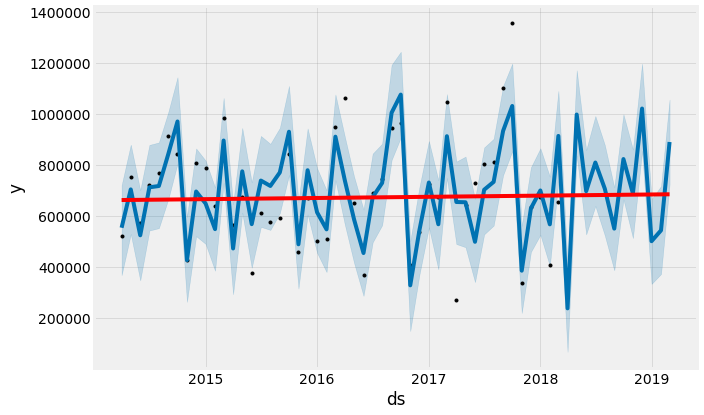

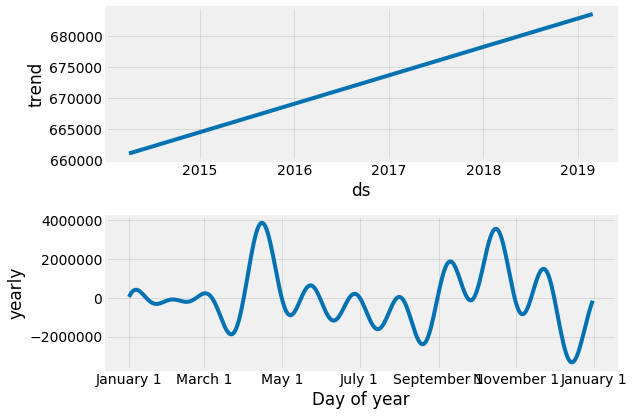

In [129]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=False,daily_seasonality=False)
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2018-03-01')])
future = prophet.make_future_dataframe(periods=12, freq= 'M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [130]:
forecast

ds          trend     yhat_lower    yhat_upper    trend_lower  \
0  2014-04-01  661063.377060  366314.327190  7.191433e+05  661063.377060   
1  2014-05-01  661440.193402  527740.481567  8.782854e+05  661440.193402   
2  2014-06-01  661829.570273  345921.696816  6.994959e+05  661829.570273   
3  2014-07-01  662206.386600  541388.302849  8.772416e+05  662206.386600   
4  2014-08-01  662595.763453  550787.789664  8.870149e+05  662595.763453   
5  2014-09-01  662985.140289  665274.620397  1.006747e+06  662985.140289   
6  2014-10-01  663361.956581  804208.039662  1.142844e+06  663361.956581   
7  2014-11-01  663751.333414  261508.275022  5.946914e+05  663751.333414   
8  2014-12-01  664128.149681  519323.715307  8.633230e+05  664128.149681   
9  2015-01-01  664517.526491  488997.018802  8.158346e+05  664517.526491   
10 2015-02-01  664906.903332  383652.519862  7.096466e+05  664906.903332   
11 2015-03-01  665258.598525  728078.106429  1.061640e+06  665258.598525   
12 2015-04-01  665647.975346  291445.456327  6.447722e+05  665647.975346   
13 2015-05-01  666024.791600  611768.109085  9.438562e+05  666024.791600   
14 2015-06-01  666414.168445  395363.135993  7.304450e+05  666414.168445   
15 2015-07-01  666790.984746  555922.084105  9.125996e+05  666790.984746   
16 2015-08-01  667180.361621  543760.587710  8.814574e+05  667180.361621   
17 2015-09-01  667569.757059  609341.500203  9.442114e+05  667569.757059   
18 2015-10-01  667946.591355  758980.903512  1.108778e+06  667946.591355   
19 2015-11-01  668335.986848  313649.926130  6.533618e+05  668335.986848   
20 2015-12-01  668712.821300  604392.806893  9.418582e+05  668712.821300   
21 2016-01-01  669102.216899  453755.887596  7.857132e+05  669102.216899   
22 2016-02-01  669491.612537  378468.798291  6.993955e+05  669491.612537   
23 2016-03-01  669855.885901  739300.569760  1.075176e+06  669855.885901   
24 2016-04-01  670245.281566  564135.088919  9.083804e+05  670245.281566   
25 2016-05-01  670622.116045  414963.950931  7.535557e+05  670622.116045   
26 2016-06-01  671011.511652  284876.972773  6.237363e+05  671011.511652   
27 2016-07-01  671388.346110  495268.934444  8.432045e+05  671388.346110   
28 2016-08-01  671777.741674  562542.768004  8.822330e+05  671777.741674   
29 2016-09-01  672167.137236  818292.086920  1.191428e+06  672167.137236   
30 2016-10-01  672543.971650  906264.670073  1.242709e+06  672543.971650   
31 2016-11-01  672933.367170  146909.170732  5.001969e+05  672933.367170   
32 2016-12-01  673310.201586  368201.760897  7.115945e+05  673310.201586   
33 2017-01-01  673699.597149  553603.534385  8.926401e+05  673699.597149   
34 2017-02-01  674088.992683  389257.504132  7.387406e+05  674088.992683   
35 2017-03-01  674440.704761  747276.901849  1.076492e+06  674440.704761   
36 2017-04-01  674830.100277  488446.296914  8.120258e+05  674830.100277   
37 2017-05-01  675206.934632  475993.308926  8.313770e+05  675206.934632   
38 2017-06-01  675596.330129  338977.068376  6.655715e+05  675596.330129   
39 2017-07-01  675973.164482  526550.263997  8.671903e+05  675973.164482   
40 2017-08-01  676362.559979  560733.271533  9.012400e+05  676362.559979   
41 2017-09-01  676751.955477  758487.060223  1.108279e+06  676751.955477   
42 2017-10-01  677128.789829  853157.525755  1.196278e+06  677128.789829   
43 2017-11-01  677518.185327  218081.735997  5.599360e+05  677518.185327   
44 2017-12-01  677895.019679  457293.404967  7.892424e+05  677895.019679   
45 2018-01-01  678284.415177  524545.430048  8.640018e+05  678284.415177   
46 2018-02-01  678673.810674  402368.424207  7.526718e+05  678673.810674   
47 2018-03-01  679025.522737  734957.118460  1.088858e+06  679025.522737   
48 2018-03-31  679402.357089   65330.353075  4.087224e+05  679402.356777   
49 2018-04-30  679779.191442  836119.869439  1.170123e+06  679779.189861   
50 2018-05-31  680168.586939  526275.550750  8.569731e+05  680168.583517   
51 2018-06-30  680545.421292  637748.594203  9.908315e+05  

In [131]:
rmse = mean_squared_error(test['sales'],forecast.tail(15)['yhat'])
print(rmse)

75853816858.46848


In [132]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

Test RMSE   Test MAPE
Simple Average                                      2.795728e+05         NaN
Alpha=0.338,SimpleExponentialSmoothing              2.803807e+05   33.540848
Alpha=0.3,SimpleExponentialSmoothing                2.807253e+05   33.403841
Alpha=0.2,Beta=0.3,DoubleExponentialSmoothing       2.758766e+05   37.354591
Alpha=0.1817,Beta=0.04544,Gamma=0.1888,TripleEx...  2.503595e+05   30.237301
Alpha=0.1,Beta=0.1,Gamma=0.2,TripleExponentialS...  2.489728e+05   33.254092
ARIMA(1,1,2)                                        3.325409e+01   32.961764
SARIMA(0,1,0)(0,1,2)12                              5.995409e+11  100.000000
SARIMA(0,0,0)(0,0,3)12                              5.995409e+11  100.000000
Prophet                                             7.585382e+10         NaN

In [133]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

Test RMSE   Test MAPE
ARIMA(1,1,2)                                        3.325409e+01   32.961764
Alpha=0.1,Beta=0.1,Gamma=0.2,TripleExponentialS...  2.489728e+05   33.254092
Alpha=0.1817,Beta=0.04544,Gamma=0.1888,TripleEx...  2.503595e+05   30.237301
Alpha=0.2,Beta=0.3,DoubleExponentialSmoothing       2.758766e+05   37.354591
Simple Average                                      2.795728e+05         NaN
Alpha=0.338,SimpleExponentialSmoothing              2.803807e+05   33.540848
Alpha=0.3,SimpleExponentialSmoothing                2.807253e+05   33.403841
Prophet                                             7.585382e+10         NaN
SARIMA(0,1,0)(0,1,2)12                              5.995409e+11  100.000000
SARIMA(0,0,0)(0,0,3)12                              5.995409e+11  100.000000

In [134]:
import fbprophet

In [135]:
m = fbprophet.Prophet()

In [136]:
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [137]:
future = m.make_future_dataframe(periods=365)

In [138]:
forecast = m.predict(future)

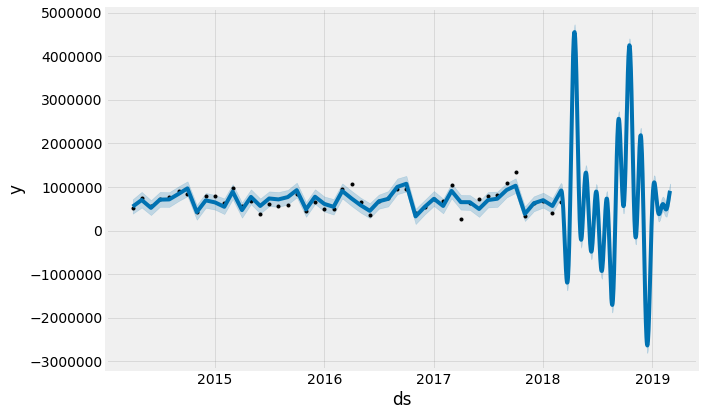

In [139]:
m.plot(forecast);

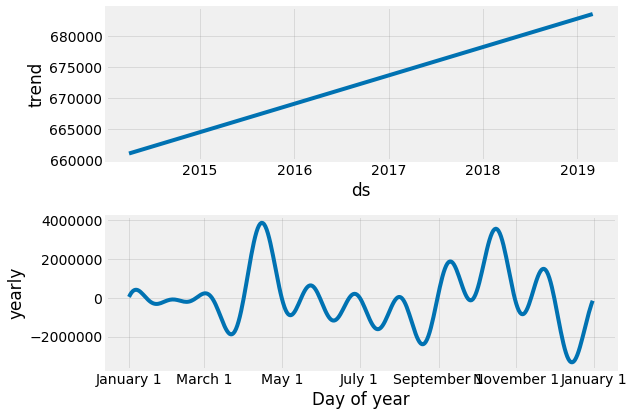

In [140]:
m.plot_components(forecast);

In [141]:
df_prophet.head()

ds       y
Date                         
2014-04-01 2014-04-01  521820
2014-05-01 2014-05-01  752658
2014-06-01 2014-06-01  571154
2014-07-01 2014-07-01  721322
2014-08-01 2014-08-01  765594

In [142]:
future.tail()

ds
408 2019-02-25
409 2019-02-26
410 2019-02-27
411 2019-02-28
412 2019-03-01

In [143]:
predict=m.predict(future)

In [144]:
predict

ds          trend     yhat_lower    yhat_upper    trend_lower  \
0   2014-04-01  661063.377060  380040.997191  7.230166e+05  661063.377060   
1   2014-05-01  661440.193402  531536.910253  8.706403e+05  661440.193402   
2   2014-06-01  661829.570273  352181.508180  6.869396e+05  661829.570273   
3   2014-07-01  662206.386600  545604.034116  8.841511e+05  662206.386600   
4   2014-08-01  662595.763453  541287.947689  8.987154e+05  662595.763453   
..         ...            ...            ...           ...            ...   
408 2019-02-25  683560.096111  598390.831507  9.398011e+05  683560.066984   
409 2019-02-26  683572.657256  643392.976219  9.966945e+05  683572.627887   
410 2019-02-27  683585.218401  679449.271720  1.020270e+06  683585.188824   
411 2019-02-28  683597.779546  722082.563920  1.071659e+06  683597.749810   
412 2019-03-01  683610.340691  732247.657522  1.085911e+06  683610.310820   

       trend_upper  additive_terms  additive_terms_lower  \
0    661063.377060  -108729.939346        -108729.939346   
1    661440.193402    41382.014699          41382.014699   
2    661829.570273  -139202.184048        -139202.184048   
3    662206.386600    48777.688388          48777.688388   
4    662595.763453    53483.465682          53483.465682   
..             ...             ...                   ...   
408  683560.125362    85943.845487          85943.845487   
409  683572.686536   130984.982806         130984.982806   
410  683585.247743   171569.020177         171569.020177   
411  683597.808985   205178.440125         205178.440125   
412  683610.370228   229311.324848         229311.324848   

     additive_terms_upper         yearly   yearly_lower   yearly_upper  \
0          -108729.939346 -108729.939346 -108729.939346 -108729.939346   
1            41382.014699   41382.014699   41382.014699   41382.014699   
2          -139202.184048 -139202.184048 -139202.184048 -139202.184048   
3            48777.688388   48777.688388   48777.688388   48777.688388   
4            53483.465682   53483.465682   53483.465682   53483.465682   
..                    ...            ...            ...            ...   
408          85943.845487   85943.845487   85943.845487   85943.845487   
409         130984.982806  130984.982806  130984.982806  130984.982806   
410         171569.020177  171569.020177  171569.020177  171569.020177   
411         205178.440125  205178.440125  205178.440125  205178.440125   
412         229311.324848  229311.324848  229311.324848  229311.324848   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
408                   0.0                         0.0   
409                   0.0                         0.0   
410                   0.0                         0.0   
411                   0.0                         0.0   
412                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
0                           0.0  552333.437714  
1                           0.0  702822.208101  
2                           0.0  522627.386226  
3                           0.0  710984.074988  
4                           0.0  716079.229135  
..                          ...            ...  
408                         0.0  769503.941598  
409                         0.0  814557.640062  
410                         0.0  855154.238578  
411                         0.0  888776.219671  
412                         0.0  912921.665539  

[413 rows x 16 columns]

In [145]:
predict[['ds','yhat','yhat_lower','yhat_upper']].head()

ds           yhat     yhat_lower     yhat_upper
0 2014-04-01  552333.437714  380040.997191  723016.615251
1 2014-05-01  702822.208101  531536.910253  870640.328933
2 2014-06-01  522627.386226  352181.508180  686939.632589
3 2014-07-01  710984.074988  545604.034116  884151.075682
4 2014-08-01  716079.229135  541287.947689  898715.386174

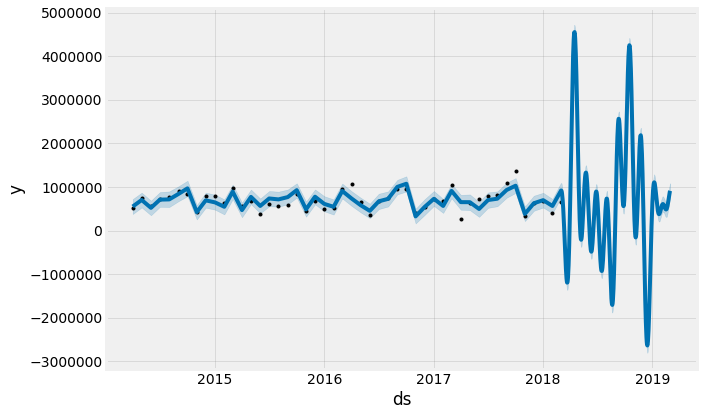

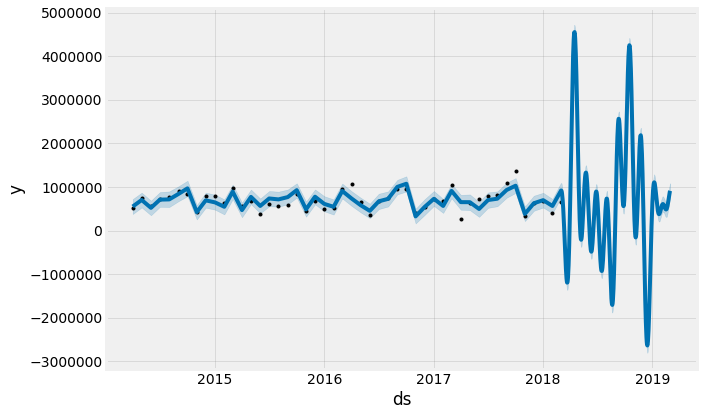

In [146]:
m.plot(predict)

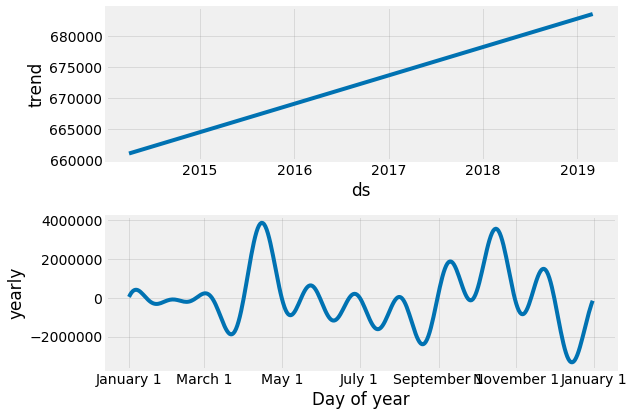

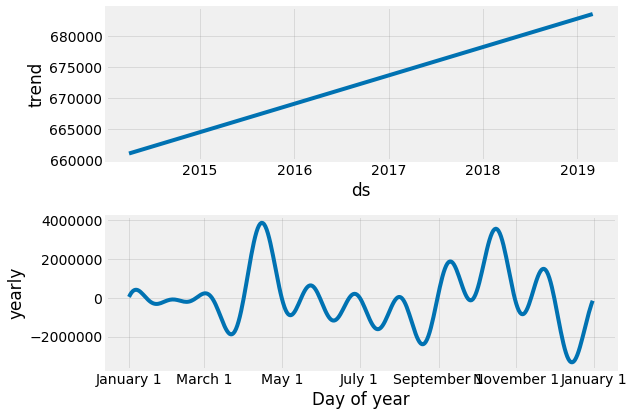

In [147]:
m.plot_components(predict)

In [148]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2016-09-02 00:00:00 and 2017-03-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [149]:
df_cv.head()

ds           yhat     yhat_lower    yhat_upper       y     cutoff
0 2016-10-01  579374.180956  483582.664352  6.723137e+05  961801 2016-09-02
1 2016-11-01  176441.192285   75619.234027  2.815846e+05  406138 2016-09-02
2 2016-12-01  845310.894080  745422.439848  9.403711e+05  537265 2016-09-02
3 2017-01-01  977086.912915  883808.790621  1.079300e+06  725786 2016-09-02
4 2017-02-01  201712.543788  110072.337625  2.940384e+05  672340 2016-09-02

In [150]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon           mse           rmse            mae      mape     mdape  \
0 31 days  2.195705e+11  468583.483162  461810.291184  1.201657  1.201657   
1 60 days  1.728257e+11  415723.052605  385445.285519  1.285631  1.285631   
2 61 days  2.649400e+10  162769.766331  122387.803514  0.294557  0.294557   
3 90 days  4.755982e+10  218082.143983  161562.346697  0.298455  0.298455   
4 92 days  9.985495e+10  315998.339536  315900.700546  0.509533  0.509533   

   coverage  
0       0.0  
1       0.0  
2       0.5  
3       0.5  
4       0.0

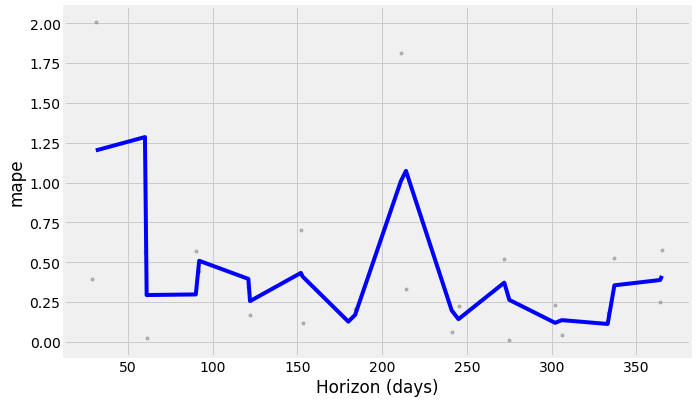

In [151]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [153]:
import statsmodels.api as sm 
arma_mod30 = sm.tsa.ARIMA(Ban_Dry['sales'], (1,0,1)).fit()

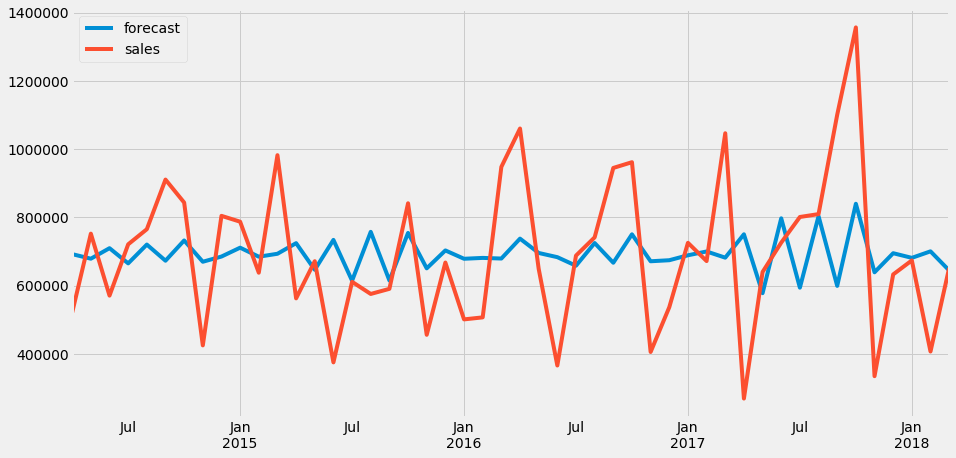

In [154]:
arma_mod30.plot_predict(dynamic=False)
plt.show()

In [156]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(Ban_Dry.sales, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  sales   No. Observations:                   48
Model:                     ARMA(1, 1)   Log Likelihood                -657.412
Method:                       css-mle   S.D. of innovations         211129.785
Date:                Sat, 21 Aug 2021   AIC                           1322.824
Time:                        11:30:53   BIC                           1330.308
Sample:                    04-01-2014   HQIC                          1325.652
                         - 03-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.926e+05    3.3e+04     20.965      0.000    6.28e+05    7.57e+05
ar.L1.sales    -0.8436      0.096     -8.763      0.000      -1.032      -0.655
ma.L1.sales     1.0000        nan        nan    

In [157]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = Ban_Dry.sales[:33]
test = Ban_Dry.sales[33:]

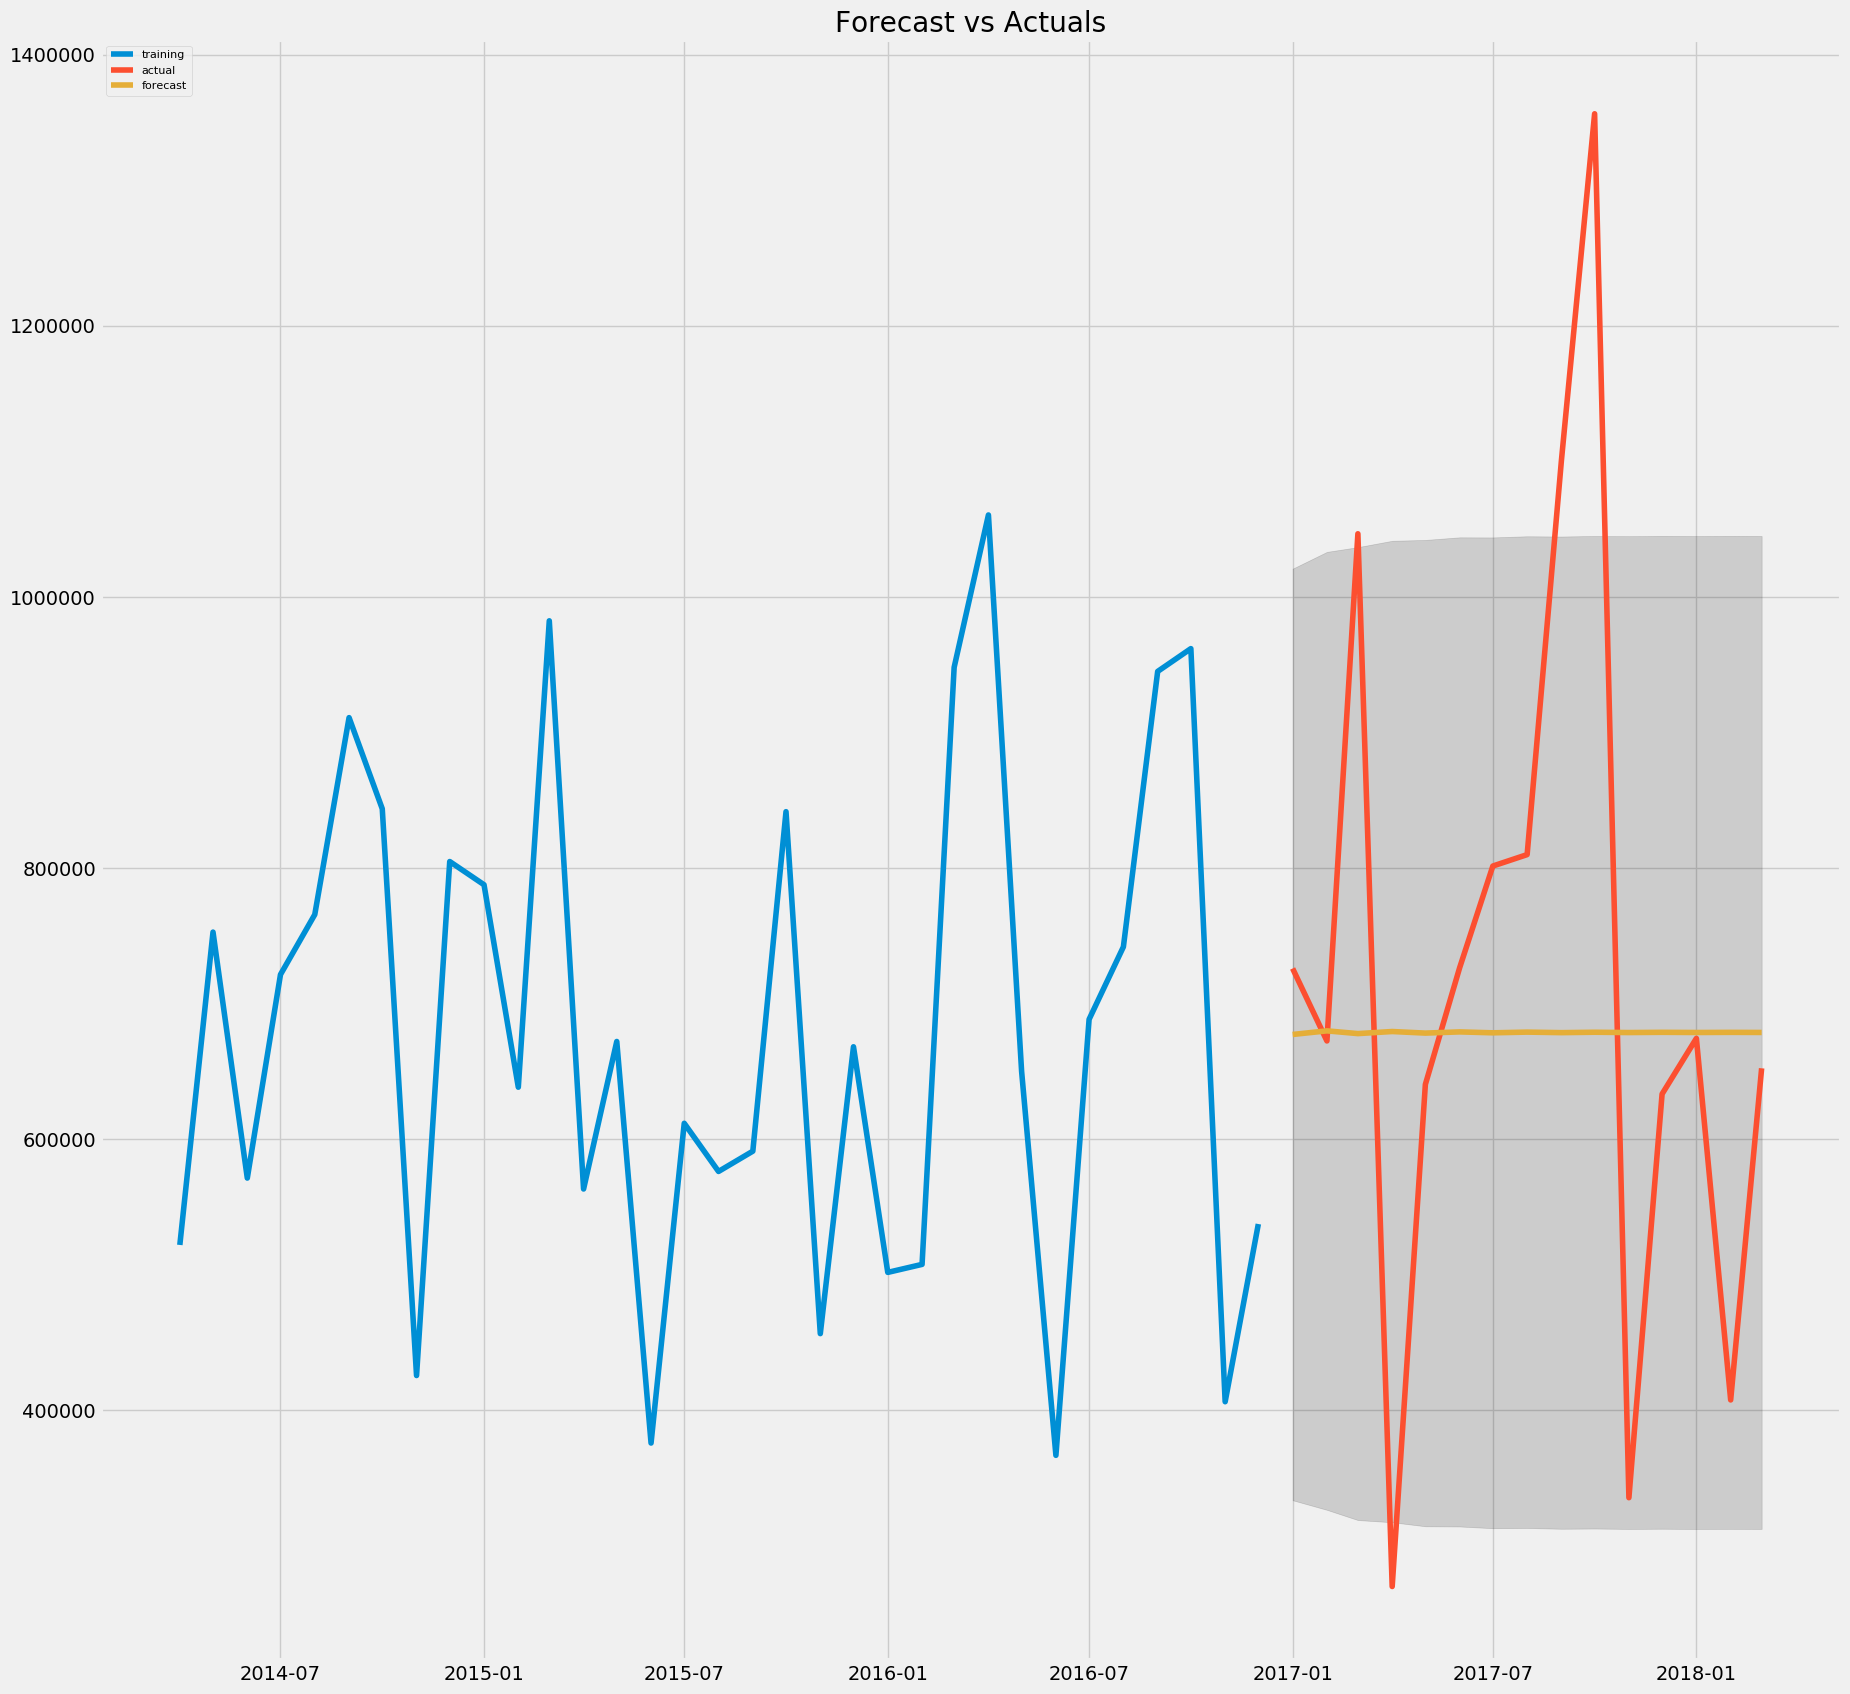

In [158]:
model = ARIMA(train, order=(1,0,1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,20), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()